<a href="https://colab.research.google.com/github/copy-del/practice-project-study/blob/eh%2Fmachine_learning/DeepLearning_%E1%84%86%E1%85%A1%E1%86%BA%E1%84%87%E1%85%A9%E1%84%80%E1%85%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 딥러닝이란?
- 인간의 신경망을 모방하여, 학습 및 예측하고 판단하는 기술
- 영상 처리, 음성 처리, 이미지 분야, 텍스트, 자연어 처리 등

- Colab : 구글이 만든 Python 에디터
- Tensorflow : 구글이 만든 딥러닝 프레임워크(라이브러리)
- Keras : Tensorflow 위에서 동작하는 사용자 친화적 라이브러리

In [83]:
import tensorflow as tf
tf.__version__ # 설치버전 확인

'2.18.0'

In [84]:
# 코랩은 리눅스 기반
# 현재 작업 디렉토리 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/SW 엔지니어/data


In [85]:
# 파일 영구저장을 위한 google drive 연동(마운트)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
# 작업 디렉토리 변경
%cd /content/drive/MyDrive/Colab Notebooks/SW 엔지니어/data

/content/drive/MyDrive/Colab Notebooks/SW 엔지니어/data


In [88]:
!pwd

/content/drive/MyDrive/Colab Notebooks/SW 엔지니어/data


#### 목표
- 공부시간에 따른 학생의 수학성적을 예측하는 회귀 모델 만들기
- Keras를 활용하여 신경망 구성 및 머신러닝 모델과 딥러닝 모델 사용법 차이 확인

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
# csv파일 불러오기

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SW 엔지니어/data/student-mat.csv', sep=';')
data

# label = G3 (최종성적)
# 성적을 에측하기 위한 여러가지 문제 데이터가 있음
# 하나의 특성을 뽑아서 성적 예측을 수행하는 딥러닝 모델

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


| 컬럼 이름       | 설명                             |
|-----------------|----------------------------------|
| school          | 학교 (GP - Gabriel Pereira, MS - Mousinho da Silveira) |
| sex             | 성별 (F - Female, M - Male)      |
| age             | 나이                             |
| address         | 주소 유형 (U - Urban, R - Rural) |
| famsize         | 가족 크기 (LE3 - 3명 이하, GT3 - 3명 초과) |
| Pstatus         | 부모 동거 상태 (T - 함께, A - 별거) |
| Medu            | 어머니 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Fedu            | 아버지 교육 수준 (0 - 없음, 1 - 초등, 2 - 중등, 3 - 고등, 4 - 대졸) |
| Mjob            | 어머니 직업 (teacher, health, services, at_home, other) |
| Fjob            | 아버지 직업 (teacher, health, services, at_home, other) |
| reason          | 학교 선택 이유 (home, reputation, course, other) |
| guardian        | 보호자 (mother, father, other)  |
| traveltime      | 통학 시간 (1 - 15분 이하, 2 - 15~30분, 3 - 30분~1시간, 4 - 1시간 초과) |
| studytime       | 주간 공부 시간 (1 - 2시간 이하, 2 - 2~5시간, 3 - 5~10시간, 4 - 10시간 초과) |
| failures        | 과목 낙제 수 (n if 1<=n<3, else 4) |
| schoolsup       | 학교 추가 지원 (yes, no)        |
| famsup          | 가족 추가 지원 (yes, no)        |
| paid            | 과외 수업 참여 (yes, no)        |
| activities      | 학교 외 활동 참여 (yes, no)     |
| nursery         | 유치원 참여 여부 (yes, no)      |
| higher          | 고등교육 희망 여부 (yes, no)    |
| internet        | 가정 내 인터넷 접속 여부 (yes, no) |
| romantic        | 로맨틱 관계 여부 (yes, no)      |
| famrel          | 가족 관계의 질 (1 - 매우 나쁨, 5 - 매우 좋음) |
| freetime        | 여가 시간의 양 (1 - 매우 적음, 5 - 매우 많음) |
| goout           | 외출 빈도 (1 - 매우 적음, 5 - 매우 많음) |
| Dalc            | 평일 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| Walc            | 주말 음주량 (1 - 매우 적음, 5 - 매우 많음) |
| health          | 현재 건강 상태 (1 - 매우 나쁨, 5 - 매우 좋음) |
| absences        | 결석 일수                        |
| G1              | 1학기 성적                       |
| G2              | 2학기 성적                       |
| G3              | 최종 성적                        |


In [91]:
# 데이터 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### 문제와 정답데이터로 분리
- 입력특성 : studytime
- 정답 : G3

In [92]:
X= data[['studytime']]
y= data['G3']

X.shape, y.shape

((395, 1), (395,))

In [93]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 머신러닝(Sklearn)과 딥러닝(TensorFlow, Keras) 모델링 비교

- 머신러닝
  - 모델 생성(완성된 객체 초기화) >> 모델 학습 > 예측 > 평가
  - 다양한 알고리즘이 이미 구현된 클래스로 제공
  - 완제품 로봇에서 도색하는 느낌 (하이퍼파라미터 조정)
  - 이미 완성된 모델 구조를 사용하므로, 특정한 알고리즘을 선택하고, 그 알고리즘의 하이퍼파라미터를 조정하는 과정에 집중한다.
- 딥러닝
  - 모델 생성(모델을 직접 구성) >> 모델 학습 > 예측 > 평가
  - 신경망의 각 층(layer) 직접 정의, 이를 조합 모델을 설계
  - 모델의 구조를 직접 설계할 수 있어 유연성이 높음
  - 레고로 조립식 로봇을 만드는 느낌
  - 단순한 다층 퍼셉트론(MLP)부터 복잡한 신경망까지 다양한 모델을 설계할 수 있다.

### 머신러닝 모델링

In [94]:
# 일반 선형회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = lr_model.predict(X_test) #  X_test의 예측값
mse = mean_squared_error(y_test, y_pred) # 실제값과 예측값을 이용해 MSE를 구함
print('평균제곱오차 : ',mse)

평균제곱오차 :  21.851194328580558


### 딥러닝 모델링
1. 신경망 구조 설계
2. 신경망 학습 방법 및 평가 방법 설정
3. 모델 학습
4. 예측 및 평가

In [96]:
# tensorflow 도구 불러오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

# Sequential : 뼈대(틀), 층(layer)을 순차적으로 쌓아 올리는 구조
# Dense : layer층
# Inputl

In [97]:
# 신경망 구조 설계

# 뼈대 생성
model = Sequential()

# 입력층 : 입력 데이터의 형태를 결정(이번 실습에서는 1개의 특성)
model.add(InputLayer(shape=(1,)))

# add() : 딥러닝 모델의 Dense(층)을 쌓는 기능
# Dense() ; 하나의 층(layer)

# 중간층 (은닉층)
model.add(Dense(units=31, activation='sigmoid'))
model.add(Dense(units=22, activation='sigmoid'))
# units : 뉴런 개수(퍼셉트론 개수)
# activation : 활성화 함수

# 출력층
model.add(Dense(units=1, activation='linear')) # 1개의 뉴런으로 구성된 출력층
# 출력 데이터의 형태에 따라 유닛 수를 결정 (현재는 연속형 데이터 한개를 예측하므로 1로 설정)

In [98]:
# 2. 학습 방법 및 평가 방법 설정
model.compile(loss = 'mean_squared_error',
              optimizer='SGD', # 최적화 함수, 확률적 경사하강법
              metrics=['accuracy']) # 평가방법, 정확도

In [99]:
# 3. 모델 학습
h = model.fit(X_train, y_train, validation_split=0.2, # 훈련데이터의 20%를 검증 데이터로 활용하겠다.
              epochs=20 # 전체 훈련 데이터셋을 사용하여 모델을 학습시키는 횟수(반복학습 횟수)
              )

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0214 - loss: 98.5231 - val_accuracy: 0.0000e+00 - val_loss: 26.8099
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 23.0362 - val_accuracy: 0.0000e+00 - val_loss: 18.5376
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 18.3692 - val_accuracy: 0.0000e+00 - val_loss: 18.5217
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 21.9626 - val_accuracy: 0.0000e+00 - val_loss: 18.4955
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 21.3141 - val_accuracy: 0.0000e+00 - val_loss: 18.4855
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 20.2615 - val_accuracy: 0.0000e+00 - val_loss: 18.4948
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0000e+00 - loss: 20.2562 - val_accuracy: 0.0000e+00 - val_loss: 18.4889
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy

In [100]:
# 매 epoch마다 결과값이 들어감
h.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

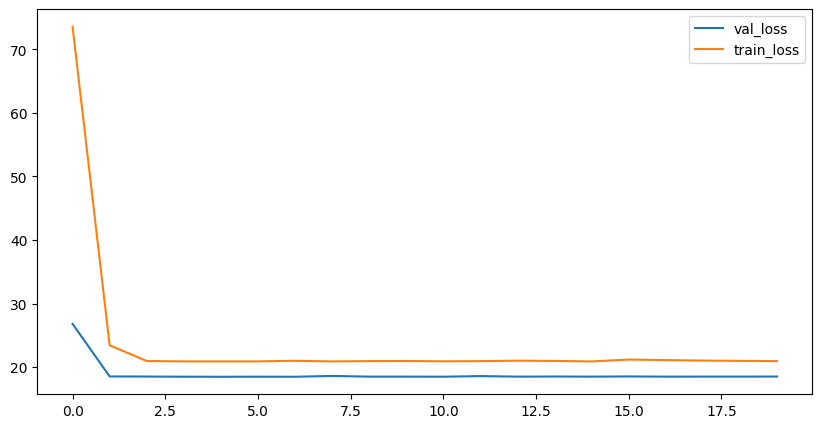

In [101]:
#학습 결과 시각화
plt.figure(figsize=(10,5))

h.history['loss'], h.history['val_loss']

plt.plot(h.history['val_loss'], label='val_loss')

plt.plot(h.history['loss'], label='train_loss')
plt.legend() #범례
plt.show()

# 초기 에포크 동안 손실 값(loss)이 급격히 변동
# 이는 모델이 초기 학습 단계에서 최적의 가중치 값을 찾기 위해 많은 조정이 이루어지기 때문.

In [36]:
#시각화 해석
#학습정확도(acc), 검증 정확도(val_acc) 모두 거의 일정한 값을 유지하고 있으며,이 값들은 낮은 수준에 머무르고 있다.
# 이러한 패턴은 모델이 학습되지 않고 있는 상황을 나타냄

#활성화 함수를 다시 선택, 옵티마이저 선택, 모델 구조 변경, 학습률 조정

In [111]:
model2 = Sequential()

# 입력층: Sequential에 쌓는 첫번째 층, 뉴런 수는 특성의 개수
model2.add(InputLayer(input_shape=(30,)))

# 다층퍼셉트론 구현
# 은닉층(중간층): 입력층과 출력층을 제외한 다른 모든 층
model2.add(Dense(units=32, activation='sigmoid'))
model2.add(Dense(units=64, activation='sigmoid'))
model2.add(Dense(units=128, activation='sigmoid'))


# 출력층 : 가장 마지막에 있는 층, 결과를 종합하는 층 / unit 수 = 예측하고 싶은 수(각각의 확률값)
model2.add(Dense(units=1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [112]:
# 학습 방법 및 평가 방법 설정
model2.compile(loss='binary_crossentropy',
              optimizer = 'adam', # 최적화 방법 : 확률적 경사하강법
              metrics=['accuracy'])

(276, 1)


In [115]:
# 모델 학습
h = model2.fit(X_test, y_test, validation_split=0.2, epochs=20)

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 30, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
  • training=True
  • mask=None

In [113]:
# 모델 평가
model2.evaluate(X_test, y_test)

# 손실값, 정확도

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_30" is incompatible with the layer: expected axis -1 of input shape to have value 30, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
  • training=False
  • mask=None